# Pymaceuticals Inc.
---

### Capomulin Analysis

In this challenge, I was asked to analyze code that came from Pymaceuticals, Inc. The dataset reflects 249 mice that have squamous cell carcinoma tumors treated with anti-tumor regimens over the course of 45 days. The scientists wanted to see what the data from this study revealed concerning the drug treatment’s effectiveness, specifically related to a drug called Capomulin. The number of mice studied in total was 249. There was one duplicate Mouse ID in the study, "g989", which was subsequently dropped from the data set when the data was cleaned. This cleaning left the data set with a total of 248 mice ID's to be analyzed. 
The Capomulin drug regimen had a mean tumor volume of 40.675, median tumor volume of 41.557, and a tumor volume standard deviation of 4.994. On the bar graphs the Capomulin visually indicated it had the highest number of observed mouse timepoints, followed closely by Ramicane. 
The mice studied consisted of 51% male and 49% female mice. In the plotting the line graph for a specific mouse who was treated with Capomulin, “mouse I509”, it was revealed that generally the more days that passed, the smaller the tumor volume number became. 
The scatter plot generally indicated that the more the mice weighed, the larger the tumors were. The correlation coefficient between the mice weight and average tumor volume was 0.84. The linear regression was R-squared = 0.71.
Based on the data, Capomulin is the best choice for tumor reduction when compared to the other treatment regimens in the study. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")


# Display the data table for preview
merged_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
unique_mice_count_cleaned = merged_data["Mouse ID"].nunique()
print(f"Number of unique mice IDs: {unique_mice_count_cleaned}")

Number of unique mice IDs: 249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = merged_data.loc[merged_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID']

print(duplicate_mouse_ids.unique())

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_ids = merged_data.loc[merged_data["Mouse ID"] =='g989']
duplicate_mouse_ids

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Display everything except for rows where Mouse ID is "g989"

no_duplicates_df=merged_data.loc[merged_data["Mouse ID"] !='g989']
no_duplicates_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
count = no_duplicates_df["Mouse ID"].nunique()

print(f"Number of unique mice IDs after cleaning: {count}")

Number of unique mice IDs after cleaning: 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Calculate mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = no_duplicates_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    mean=np.mean, median=np.median, variance=np.var, std=np.std, sem=st.sem
)

# Rename the columns in the summary DataFrame
summary_stats = summary_stats.rename(columns={
    "mean": "Mean Tumor Volume",
    "median": "Median Tumor Volume",
    "variance": "Tumor Volume Variance",
    "std": "Tumor Volume Std. Dev",
    "sem": "Tumor Volume Std. Err"
})

# Display the summary statistics table
summary_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

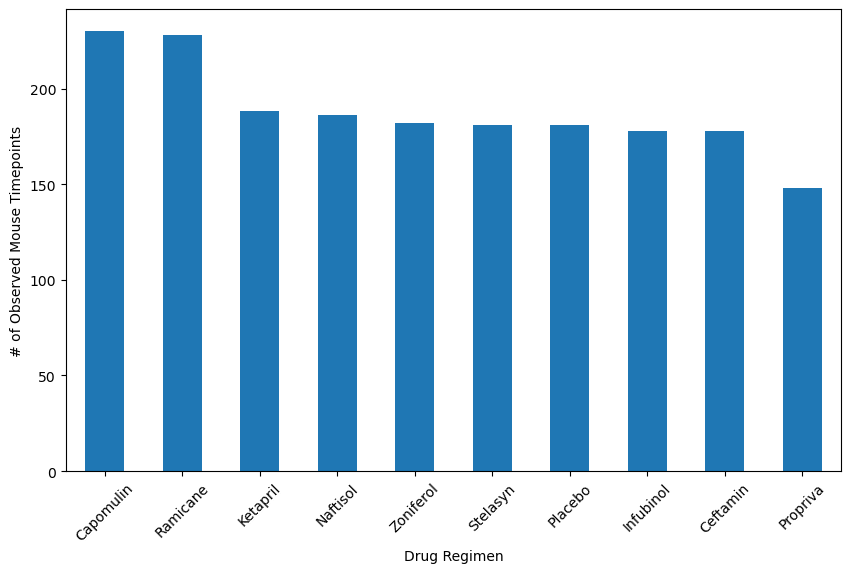

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Count the number of rows for each drug regimen
drug_regimen_counts = no_duplicates_df["Drug Regimen"].value_counts()

# Generate a bar plot
drug_regimen_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=45)
plt.show()

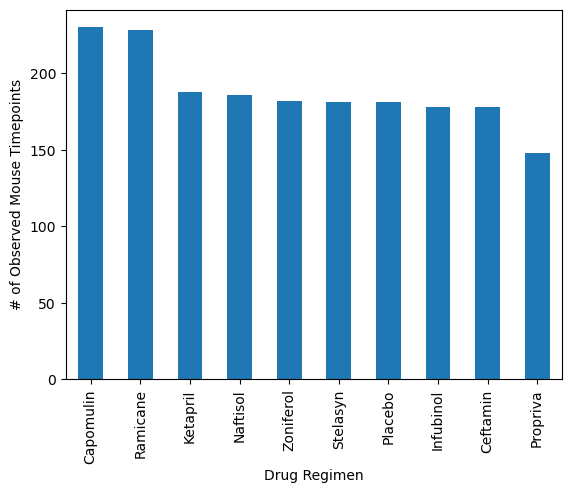

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
bar_chart = no_duplicates_df["Drug Regimen"].value_counts().plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()


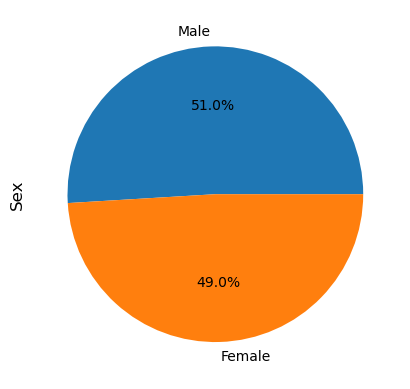

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


gender_distribution = no_duplicates_df["Sex"].value_counts()
gender_distribution.plot(kind='pie', autopct='%1.1f%%', legend=False)
plt.ylabel('Sex',fontsize = 12)

plt.show()



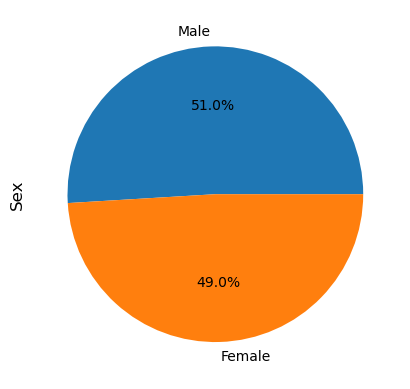

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_distribution,labels=gender_distribution.index.values,autopct='%1.1f%%')
plt.ylabel('Sex',fontsize = 12)

plt.show()


## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_timepoints = no_duplicates_df.groupby(["Mouse ID"])['Timepoint'].max()
final_timepoints = final_timepoints.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = final_timepoints.merge(no_duplicates_df,on=['Mouse ID','Timepoint'],how="left")

In [13]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_regimens:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_volume_data.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


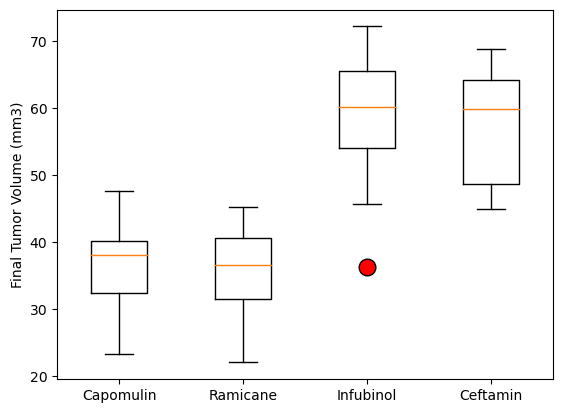

In [14]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
out = dict(markerfacecolor='red',markersize=12)
plt.boxplot(tumor_volume_data, labels = treatment_regimens,flierprops=out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

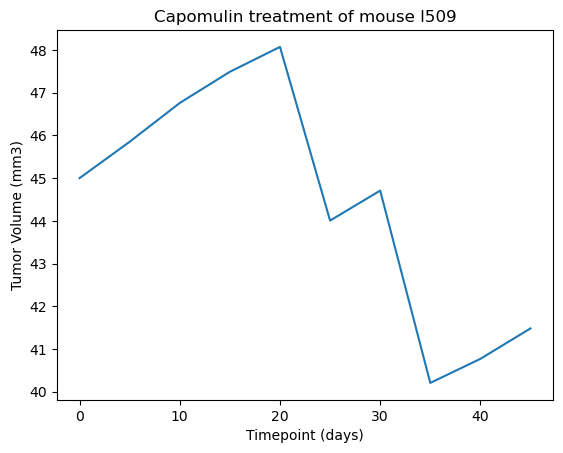

In [33]:
# Select a single mouse treated with Capomulin
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_table = no_duplicates_df.loc[no_duplicates_df['Drug Regimen'] == "Capomulin"]
mousedata = capomulin_table.loc[capomulin_table['Mouse ID']== 'l509']
plt.plot(mousedata['Timepoint'],mousedata['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()


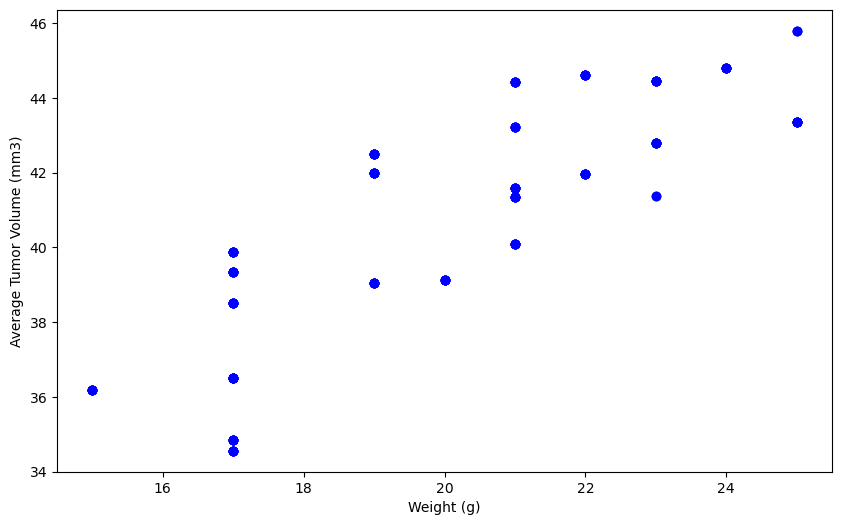

In [36]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


# Filter the data to select only the rows for the Capomulin regimen
capomulin_data = no_duplicates_df[no_duplicates_df["Drug Regimen"] == "Capomulin"]


# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Merge the average tumor volume data with the mouse weight data
merged_data = pd.merge(capomulin_data, average_tumor_volume, on="Mouse ID")
merged_data = merged_data.rename(columns={"Tumor Volume (mm3)_y": "Average Tumor Volume (mm3)"})

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_data["Weight (g)"], merged_data["Average Tumor Volume (mm3)"], marker="o", facecolors="blue", edgecolors="blue", alpha=0.75)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Show the plot
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


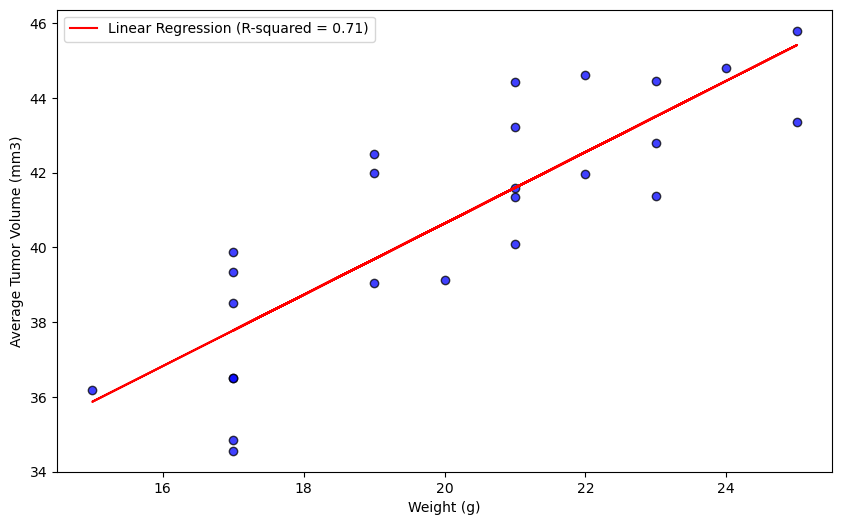

In [47]:
# Calculate the average tumor volume per mouse
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

# Create a DataFrame to store the average tumor volume and weight data
average_data = pd.DataFrame({"Mouse Weight (g)": mouse_weight, "Average Tumor Volume (mm3)": average_tumor_volume})

# Calculate the correlation coefficient
correlation_coefficient = average_data["Mouse Weight (g)"].corr(average_data["Average Tumor Volume (mm3)"])

# Display the correlation coefficient
print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient:.2f}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(average_data["Mouse Weight (g)"], average_data["Average Tumor Volume (mm3)"])

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(average_data["Mouse Weight (g)"], average_data["Average Tumor Volume (mm3)"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Plot the regression line
regress_values = slope * average_data["Mouse Weight (g)"] + intercept
plt.plot(average_data["Mouse Weight (g)"], regress_values, "r-", label=f"Linear Regression (R-squared = {r_value**2:.2f})")

# Show the plot
plt.legend()
plt.show()
